In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Install scipy for dendrogram plot

In [ ]:
#pip install scipy 

## Iris dataset

In [ ]:
data = pd.read_csv('C:\\Users\\Eugenio_Py\\Desktop\\Notebooks\\datasets\\iris.csv', sep=";", header=0, index_col=0)
data.head()

Our aim is to make clusters from this data that can segment similar flowers together.

We have to normalize/scale the data so that the scale of each variable is the same. 

If the scale of the variables is not the same, the model might become biased towards the variables with a higher magnitude.

In [ ]:
X = data.iloc[:, 0:4]
X

In [ ]:
# autoscale the data
from sklearn.preprocessing import scale
X = scale(X.values)
X

In [ ]:
data_scaled = pd.DataFrame(X)
data_scaled.index = data.index
data_scaled = pd.concat([data_scaled, data.variety], axis = 1)
data_scaled.columns = data.columns
data_scaled.head()

We can see that the scale of all the variables is almost similar. 

Let’s first draw the dendrogram to help us decide the number of clusters for this particular problem.

We have 3 clusters (virginica, versicolor, setosa). 
Let’s now apply hierarchical clustering for 3 clusters

In [ ]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In the following formula we can set:
 - **affinity**, default=’euclidean’: Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”,    “manhattan”, “cosine”, or “precomputed”. If linkage is “ward”, only “euclidean” is accepted. If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method;
 - **n_clusters**, default=2: The number of clusters to find. It must be None if distance_threshold is not None;
 - **linkage**, default = 'ward': Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

     - ‘ward’ minimizes the variance of the clusters being merged.

     - ‘average’ uses the average of the distances of each observation of the two sets.

     - ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.

     - ‘single’ uses the minimum of the distances between all observations of the two sets.

In [ ]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(affinity='euclidean', n_clusters=3, linkage='single', compute_distances = True)

In [ ]:
model

In [ ]:
model.fit_predict(X)

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)
model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p = 4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

We can see the values of 0s, 1s and 2s in the output since we defined 3 clusters. 
0 represents the points that belong to the first cluster, 1 those belonging to the second cluster and 2 represents points in the third cluster.

In [ ]:
import plotly.express as px
fig = px.scatter(data_scaled, x="petal.length", y="petal.width", color="variety", hover_data=['variety'])
fig.update_layout(
    height=600,
    width=800,
    title_text='Original Samples')
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter(data_scaled, x="petal.length", y="petal.width", color=model.labels_)
fig.update_layout(
    height=600,
    width=800,
    title_text='Cluster Analysis')
fig.show()

## K-means

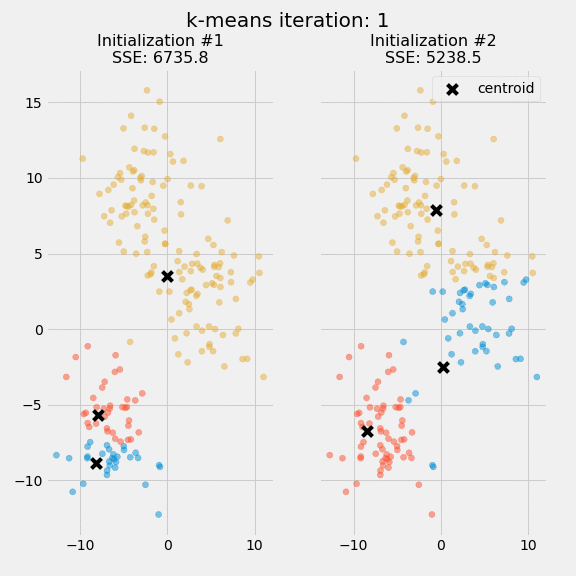

In [ ]:
pip install kneed

In [ ]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

K-means parameters are:
 - **init** controls the initialization technique. The standard version of the k-means algorithm is implemented by setting init to "random". Setting this to "k-means++" employs an advanced trick to speed up convergence.

 - **n_clusters** sets k for the clustering step. This is the most important parameter for k-means.

 - **n_init** sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE - a measure of variability.

 - **max_iter** sets the number of maximum iterations for each initialization of the k-means algorithm.

In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters=3, # 3 varieties
    n_init=10, # number of trials
    max_iter=300,
    random_state=42
)

In [ ]:
kmeans.fit(X)# on the autoscaled data

In [ ]:
# The lowest SSE value
kmeans.inertia_

In [ ]:
# The number of iterations required to converge
kmeans.n_iter_

In [ ]:
# View the cluster values
kmeans.labels_

In [ ]:
kmeans.labels_[:5]

In [ ]:
import plotly.express as px
fig = px.scatter(data_scaled, x="petal.length", y="petal.width", color="variety", hover_data=['variety'])
fig.update_layout(
    height=600,
    width=800,
    title_text='Original Samples')
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter(data_scaled, x="petal.length", y="petal.width", color=kmeans.labels_)
fig.update_layout(
    height=600,
    width=800,
    title_text='Cluster Analysis')
fig.show()

#### Choosing the Appropriate Number of Clusters
In this section, you’ll look at two methods that are commonly used to evaluate the appropriate number of clusters using the __elbow (knee) method__ that run several k-means, increment k with each iteration, and record the SSE:

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

In [ ]:
 plt.style.use("ggplot") #https://matplotlib.org/3.5.1/gallery/style_sheets/style_sheets_reference.html
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE - variability")
 plt.show()

In [ ]:
# Find the knee!
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters=4, # 4 varieties
    n_init=10, # number of trials
    max_iter=300,
    random_state=42
)

In [ ]:
kmeans.fit(X)# on the autoscaled data

In [ ]:
import plotly.express as px
fig = px.scatter(data_scaled, x="petal.length", y="petal.width", color=kmeans.labels_)
fig.update_layout(
    height=600,
    width=800,
    title_text='Cluster Analysis')
fig.show()

## Plants dataset

In [ ]:
#import data
data = pd.read_csv('C:\\Users\\Eugenio_Py\\Desktop\\Notebooks\\datasets\\plants.txt', sep="\t")
data.head()

In [ ]:
# autoscale data
X = data.iloc[:, 2:10]
X = scale(X.values)
data_scaled = pd.concat([data.Plants, data.Type, pd.DataFrame(X)], axis = 1)
data_scaled.columns = data.columns
data_scaled.head()

In [ ]:
# build the model
model = AgglomerativeClustering(affinity='manhattan', n_clusters=3, linkage='complete', compute_distances = True)

In [ ]:
model.fit_predict(X)

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)
model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=2)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter(data_scaled, x="Cd", y="Pb", color="Type", hover_data=['Type'])
fig.update_layout(
    height=600,
    width=800,
    title_text='Original Samples')
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter(data_scaled, x="Cd", y="Pb", color=model.labels_)
fig.update_layout(
    height=600,
    width=800,
    title_text='Cluster Analysis')
fig.show()

## Various Agglomerative Clustering on a 2D embedding of digits

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

# Generate sample data
n_samples = 1500
np.random.seed(0)
t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t)
y = t * np.sin(t)


X = np.concatenate((x, y))
X += 0.7 * np.random.randn(2, n_samples)
X = X.T

# Create a graph capturing local connectivity. Larger number of neighbors
# will give more homogeneous clusters to the cost of computation
# time. A very large number of neighbors gives more evenly distributed
# cluster sizes, but may not impose the local manifold structure of
# the data
knn_graph = kneighbors_graph(X, 30, include_self=False)
my_distance = "manhattan"

for n_clusters in (30, 3):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(("average", "complete", "single")): #"ward" only with "affinity" = "euclidean"
            plt.subplot(1, 4, index + 1)
            model = AgglomerativeClustering(
                linkage=linkage, n_clusters=n_clusters, affinity=my_distance,
            )
            t0 = time.time()
            model.fit(X)
            elapsed_time = time.time() - t0
            plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap=plt.cm.nipy_spectral)
            plt.title(
                "linkage=%s\n(time %.2fs)" % (linkage, elapsed_time),
                fontdict=dict(verticalalignment="top"),
            )
            plt.axis("equal")
            plt.axis("off")

            plt.subplots_adjust(bottom=0, top=0.83, wspace=0, left=0, right=1)
            plt.suptitle(
                "n_cluster=%i, affinity = %r"
                % (n_clusters, my_distance),
                size=17,
            )


plt.show()

## Dataset alcohol

In [ ]:
# Import .xlsx file with column names (header=0) and row names (index_col=0), select also the sheet named 'training'
data = pd.read_excel("C:/Users/Eugenio_Py/Desktop/Notebooks/datasets/alcohol.xlsx", sheet_name='training', header=0, index_col=0) 
data.head()

In [ ]:
data.shape

In [ ]:
data.Class.value_counts(normalize=False)

In [ ]:
X = data.iloc[:, 1:13]
X = scale(X.values)
data_scaled = pd.DataFrame(X)
data_scaled.index = data.index
data_scaled = pd.concat([data.Class, data_scaled], axis = 1)
data_scaled.columns = data.columns
data_scaled.head()

In [ ]:
model = AgglomerativeClustering(affinity='euclidean', n_clusters=2, linkage='ward', compute_distances = True)

In [ ]:
model.fit_predict(X)

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)
model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter(data_scaled, x="Acetaldehyde", y="Ethyl_acetate", color="Class", hover_data=['Class'])
fig.update_layout(
    height=600,
    width=800,
    title_text='Original Samples')
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter(data_scaled, x="Acetaldehyde", y="Ethyl_acetate", color=model.labels_)
fig.update_layout(
    height=600,
    width=800,
    title_text='Cluster Analysis')
fig.show()

# Further algorithms based on density - DBSCAN and OPTICS

In [ ]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

In [ ]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

In [ ]:
# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)


In [ ]:
OMP_NUM_THREADS=1

In [ ]:
# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 10,
    "n_clusters": 3,
    "min_samples": 20,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 20,
            "xi": 0.25,
        },
    ),
    (noisy_moons, {"damping": 0.75, "preference": -220, "n_clusters": 2}),
    (blobs, {}),
    
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params["n_clusters"])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )
    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
    )
    dbscan = cluster.DBSCAN(eps=params["eps"])
    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )
    affinity_propagation = cluster.AffinityPropagation(
        damping=params["damping"], preference=params["preference"], random_state=0
    )
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        affinity="cityblock",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )
    birch = cluster.Birch(n_clusters=params["n_clusters"])
    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"], covariance_type="full"
    )

    clustering_algorithms = (
        ("Ward", ward),
        ("DBSCAN", dbscan),
        ("OPTICS", optics)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()

### DBSCAN in real life

In [ ]:
data = pd.read_csv("C:/Users/Eugenio_Py/Desktop/Notebooks/datasets/Mall_Customers.csv", sep=",",index_col=0,header=0) # importing the dataset

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
# extracting two columns
x = data.loc[:, ['Annual_Income',
                 'Spending_Score']].values
x

Before we apply the __DBSCAN model__, first, we need to define __two parameters__.

__MinPoints__: the minimum number of points to be used to recognize a cluster:
               Rule of thumb:
               - if the dataset has two dimensions, use the **min sample per cluster as 4**;
               - if the data has more than two dimensions, the min sample per cluster should be:                      **Min_sample(MinPoints) = 2 * Data dimension**

Since our data is two-dimensional, we shall use the default value of 4 as our MinPoint parameter.

__Epsilon (Eps)__: a strategy to calculate the value of Eps, we shall calculate the distance between each data point to its closest neighbor using the __Nearest Neighbours__ (we will see this with supervised ML). 

After that, we sort them and finally plot them. From the plot, we identify the maximum value at the curvature of the graph. This value is our Eps.

In [ ]:
#Compute data proximity from each other using Nearest Neighbours

from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x) # finding the nearest neighbours

In [ ]:
# Sort and plot the distances results

distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (25,15) # setting the figure size
plt.plot(distances) # plotting the distances
plt.xticks(np.arange(1, 250, step=7))
plt.show() # showing the plot

From the above plot, we note the **maximum curvature of the curve is about eight**, and thus we picked our Eps as 8.

We now have our two parameters as:

**MinPoints = 4
Eps = 8**

Now that we have the parameters let us implement the DBSCAN model.

In [ ]:
# Implementing the DBSCAN model

from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 8, min_samples = 4).fit(x) # fitting the model
labels = dbscan.labels_ # getting the labels

In [ ]:
# Plot the clusters

plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Income") # X-axis label
plt.ylabel("Spending Score") # Y-axis label
plt.show() # showing the plot

### Compare K-means and DBSCAN with 2 moons

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons # to create MOONS!
from sklearn.metrics import adjusted_rand_score

In [ ]:
# simulate the data and scale them
features, true_labels = make_moons(
    n_samples=250, noise=0.05, random_state=42
)
scaled_features = scaler.fit_transform(features)

In [ ]:
plt.scatter(scaled_features[:, 0], scaled_features[:, 1])
plt.show()

In [ ]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

In [ ]:
# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

In [ ]:
# Compute the silhouette scores for each algorithm - the best number of clusters
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
   scaled_features, dbscan.labels_
).round (2)

In [ ]:
kmeans_silhouette

In [ ]:
dbscan_silhouette

Now plot the comparison!

In [ ]:
# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle(f"Clustering Algorithm Comparison", fontsize=16)
fte_colors = {
    0: "red",
    1: "blue",
}
# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title(
    f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12}
)

# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
ax2.set_title(
    f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12}
)
plt.show()